Đã tạo file pickle thành công!
(8189, 3)


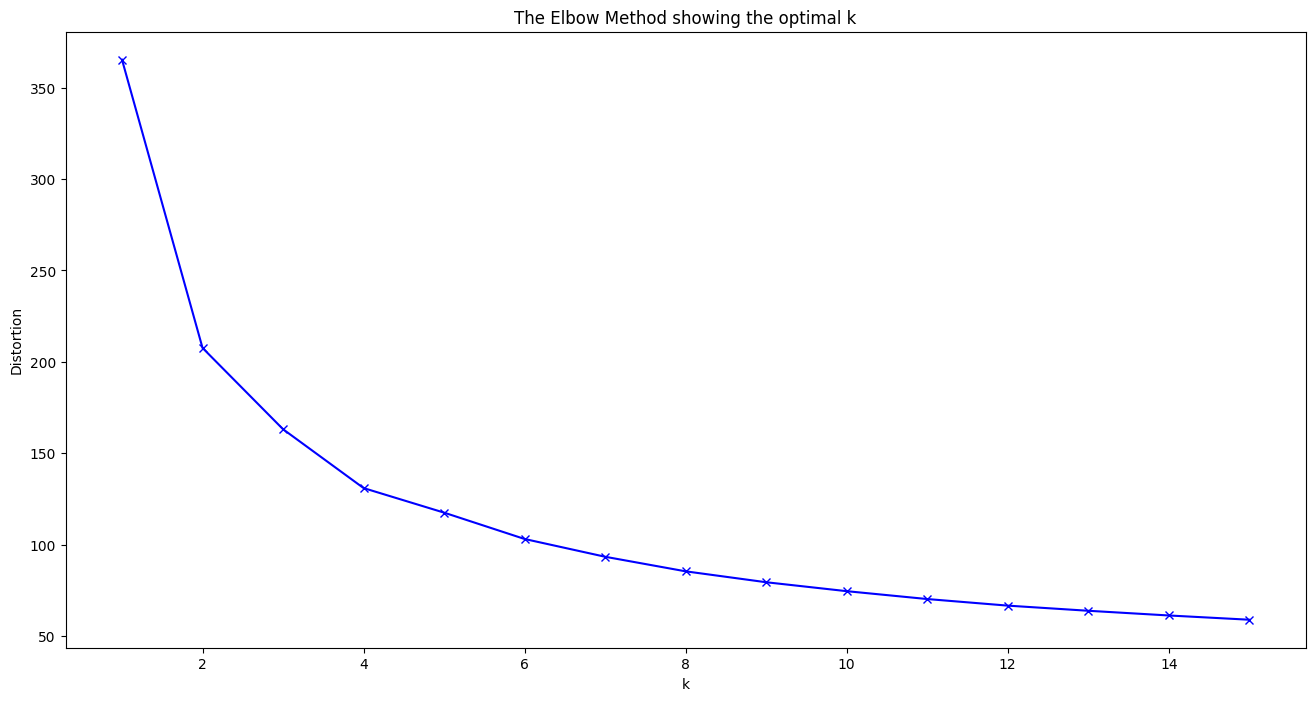

[[0.12606431 0.19861346 0.26924224]
 [0.19494259 0.4815187  0.55069074]
 [0.25687114 0.31563938 0.31844439]
 [0.43262013 0.47441952 0.49418713]
 [0.33607566 0.39764109 0.41280906]
 [0.38398637 0.35753074 0.62608426]
 [0.12952223 0.37427345 0.41080876]
 [0.54456294 0.55025487 0.63131305]
 [0.19308103 0.2448327  0.48860921]]


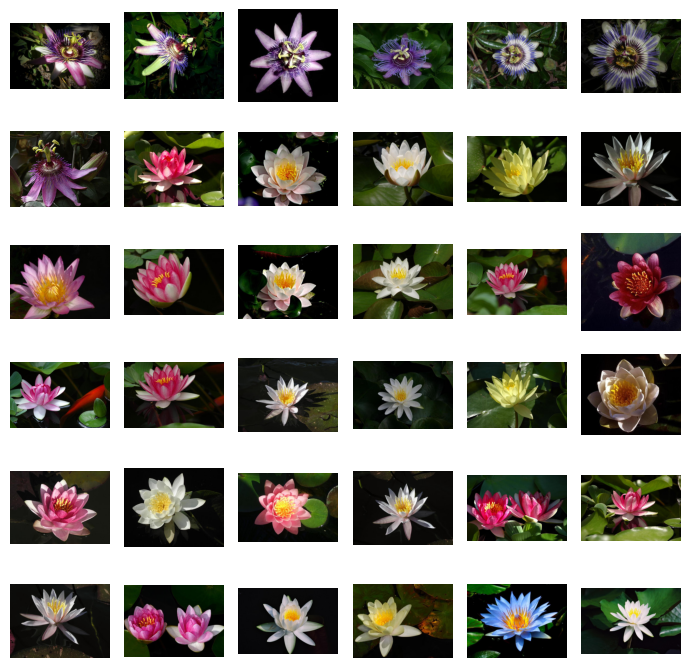

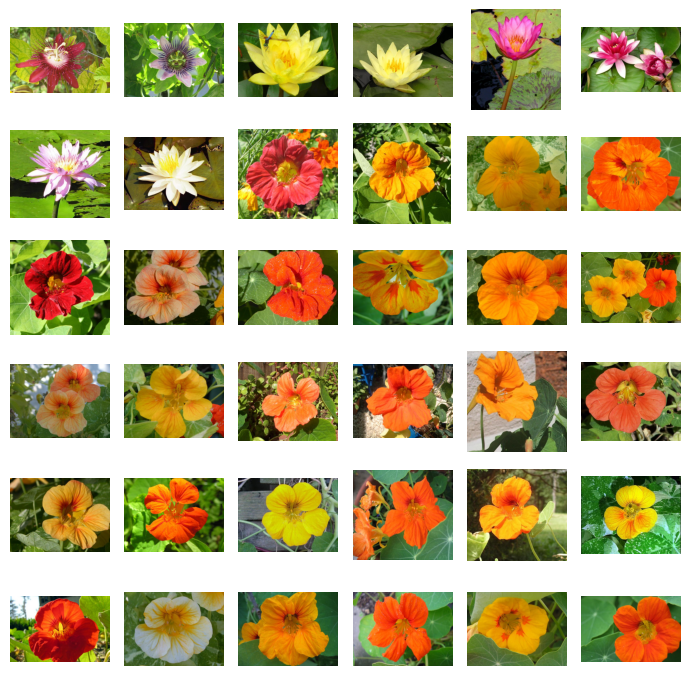

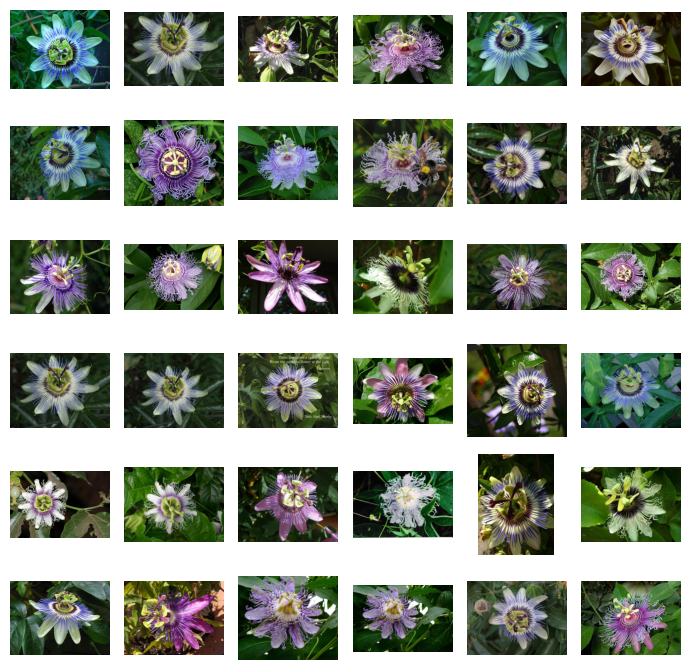

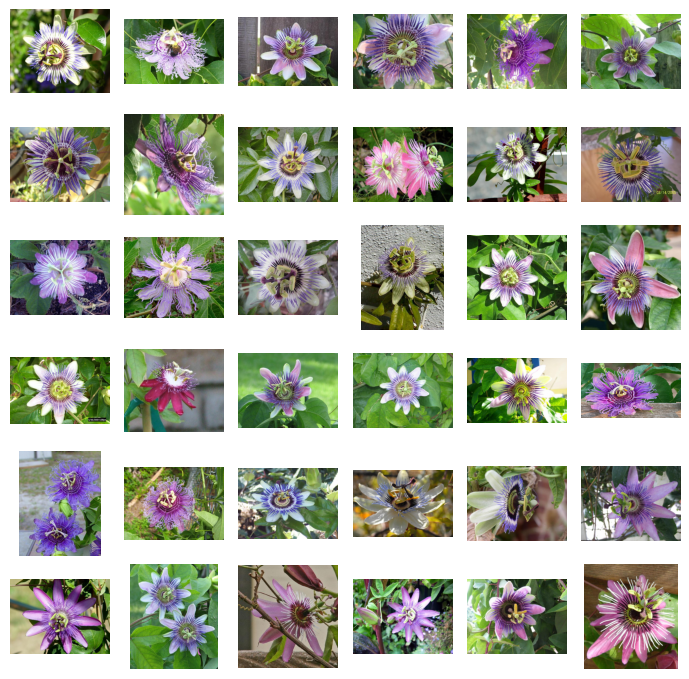

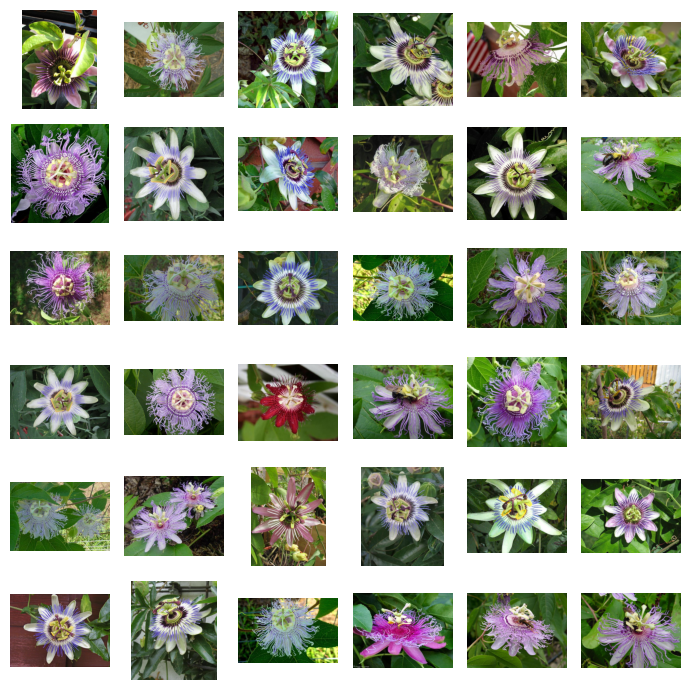

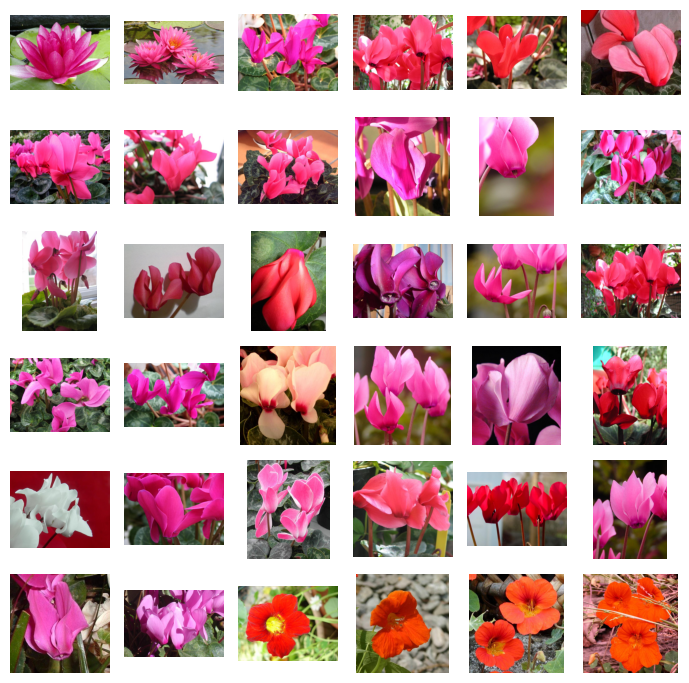

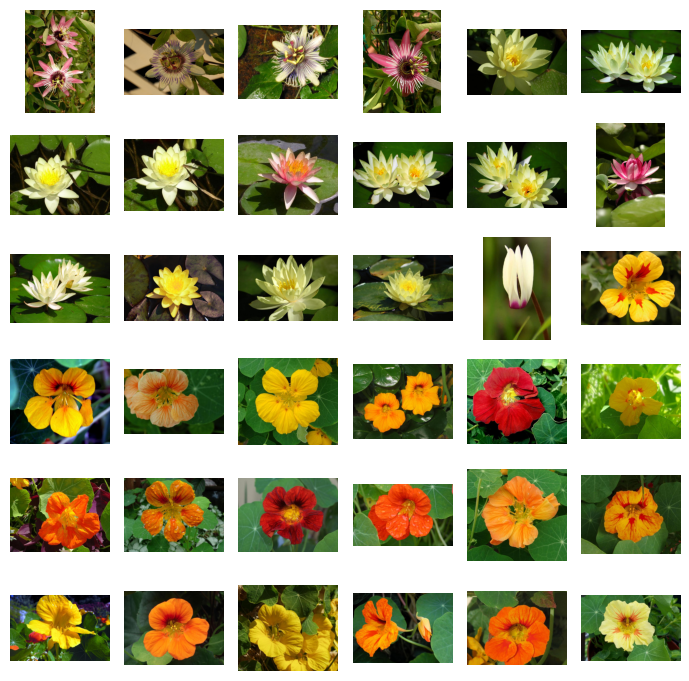

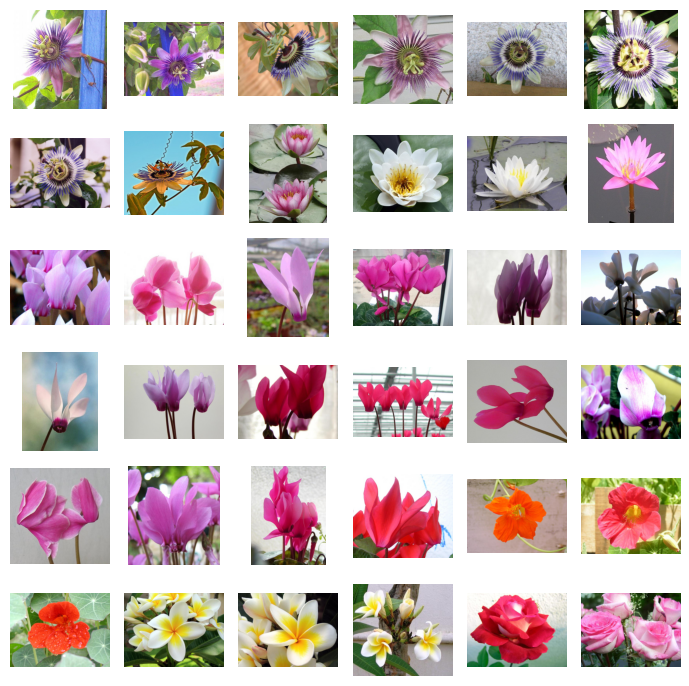

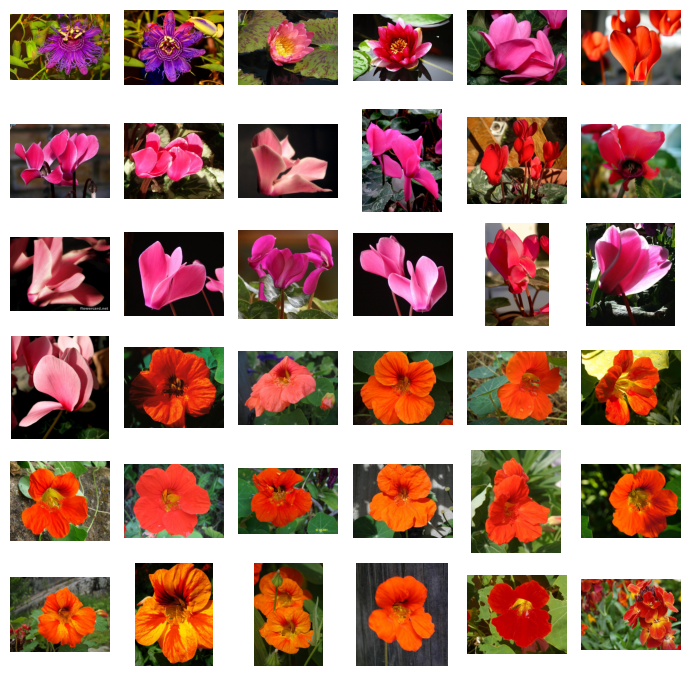

In [7]:
import cv2
import os
import numpy as np
import pickle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = r'D:\KMean\test\flowers'

def get_feature(img):
    if img is None:
        return None
    intensity = img.sum(axis=1)
    intensity = intensity.sum(axis=0) / (255 * img.shape[0] * img.shape[1])
    return intensity

def create_pickle(data_path= data_path):
    X = []
    L = []
    for file in os.listdir(data_path):
        img_path = os.path.join(data_path, file)
        
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(img_path)
            c_x = get_feature(img)
            if c_x is not None:  
                X.append(c_x)
                L.append(file)

    X = np.array(X)
    L = np.array(L)

    with open('data.pickle', 'wb') as handle:
        pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('label.pickle', 'wb') as handle:
        pickle.dump(L, handle, protocol=pickle.HIGHEST_PROTOCOL)

    print("Đã tạo file pickle thành công!")
    
    return X, L

def load_data():
    try:
        with open('data.pickle', 'rb') as handle:
            X = pickle.load(handle)
        with open('label.pickle', 'rb') as handle:
            L = pickle.load(handle)
        return X, L
    except:
        return create_pickle()
   
# Load data
X, L = load_data()
print(X.shape)

# tien hanh phan cum thu de tim k phu hop
distortions = []
K = range(1, 16)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Phan cum that voi so phan cum vua tinh toan duoc 
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters).fit(X)


# tam cua phan cum
print(kmeans.cluster_centers_)

# hien thi cac phan cum
n_row, n_col = 6, 6
for i in range(n_clusters):
    _, axs = plt.subplots(n_row, n_col, figsize=(7, 7))
    axs = axs.flatten()
    images = L[kmeans.labels_ == i][:36]  # Get images for the current cluster
    for img, ax in zip(images, axs):
        img_path = os.path.join(data_path, img)
        img_data = mpimg.imread(img_path)  # Read image
        ax.imshow(img_data)
        ax.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()